## Should We Trust that Hiking Trail Rating?

## Contributors:
- Ahmed Al Ayoubi
- Chris Kirchberg
- Harlan Kefalas

## Motivation and Dataset:
When looking for hikes, sometimes the rating and difficulty specified at websites do not always seem to meet expectations of those who hike the trail of interest. Which factors have an impact on the rating?

Taking a look a various websites, we settled on using https://www.hikingproject.com to scrape information from hikes in the state of Colorado. Currently the site lists 5,855 trails in that state which are curated by staff or contributors. Other sites like www.alltrails.com look like they would be good sites but have web scraping prevention tools in place which makes it difficult to extract information.

## Task Definition/Research Question:
As a prospective hiker of a trail, questions come to mind before choosing that trail to hike:

- Does the ratings/difficulty stated by the reviewers match that of the currated trail?
- Is there other information about the trail that might give us a better idea as what the trail should be rated?
- Is there information that might corroborate the trails difficulty/rating either by the curator or the reviewers?

Answers to these questions could possibly be gleaned by scraping data from website like https://www.hikingproject.com, cleaned and then explored by visualizations and simple summary statistics. This project seeks out to explore some possible answers and directions to these questions.



## Literature Review:
Upon searching the web for similar types of tasks, APIs, or others who have attempted something similar, we ran accross this GitHub page: https://github.com/oschow/take-a-hike

It used packages like Selenium, MongoDB, Pandas, sklearn and other resources to scrape infromation from www.alltrails.com, model, visualize and create a Hike Recommendation web app to find hikes that are similar to the hikers interests or whims.

This seemed like a good start to try our hand at exploring ratings...until we ran into blocks in web scrapping AllTrails.com...and so our journey began.

## Data Scraping 
Web scraping https://www.hikingproject.com from hiking trails in the state of Colorado. as stated above, 5,855 trails are listed and curated by staff or contributors. Using the Selenium automation test tool, we scraped 4,903 hiking trails in Colorado filtered by the following Data attributes:  
  
- Trail Name
- Trail Length 
- Trail Difficulty
- Trail Rating
- User Rate Number
- Trail Type
- Elev_Up
- Elev_Down 
- Highest Elevation
- Lowest Elevation
- Average Grade
- Max Grade
- Dogs and Features
- Stats Info

First, we import the required modules.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains
from random import randint
from time import sleep

Now we open the driver to the page with all the trails in Colorado. Each state, or area, has a set URL.

In [2]:
# open a web browser
driver = webdriver.Chrome()

# navigate to the page
driver.get('https://www.hikingproject.com/directory/8007418/colorado')

# locate the "Load More" button
load_more_button = driver.find_element(By.XPATH, "//button[@id='load-more-trails']")


After scrolling down past the 'Gems' and 'Recommended Trails', trails that are highly rated, we find the list of all trails in Colorado. Initially, only 10 trails are listed, but we want all the trails. So, we identify the load more button and create a loop to continue pressing it until all the trails are listed. The sleep timer ensures that we provide enough time for the new trails to load. Then we iterate all the hike identification numbers and extract the links to their pages. This is a time intensive step.

In [3]:
try:
    while load_more_button.is_displayed():
        load_more_button.click()
        sleep(randint(1,5))
except StaleElementReferenceException:
    print('Completed')

In [4]:

# locate the elements that contain the hike name and region
hike_ids = driver.find_elements(By.XPATH, "//table[@class='table table-striped trail-table']//tr/td/a") 
 
# Create alist for all the trail pages 
links = []

# iterate through the list of elements and extract the hike information
for j in range(len(hike_ids)):
    hike_link = hike_ids[j].get_attribute("href")
    links.append(hike_link)

For each trail page, we extract the attributes we want to analyze and close the browser. Time intensive step.

In [16]:
# locate the elements that contain the 'Trail Name','Trail Length','Trail Difficulty', 'Trail Rating', 'User Rate Number' 'Trail Type', 'Elev_Up', 'Elev_Down', 'Highest Elevation', 'Lowest Elevation', 'Average Grade', 'Max Grade', 'Dogs and Features'
hike_list =[]
links_backup = cpy_list = copy.deepcopy(links) # creates a copy of the links list
num_visit = 0
for link in links:
        driver.get(link)
        
        hike_name = driver.find_element(By.ID, "trail-title")
        
        hike_difficulty = [d.text for d in driver.find_elements(By.CLASS_NAME, 'trail-subheader')]
        
        hike_rating = [r.text for r in driver.find_elements(By.CSS_SELECTOR, '#title-stars > span.small')]
        
        no_userRate = [r.text for r in driver.find_elements(By.CSS_SELECTOR, '#title-stars > span.small')]
        
        dog_feature = [d.text for d in driver.find_elements(By.CSS_SELECTOR, '#trail-text > div:nth-child(2) > h3 > span')]
        
        stats = driver.find_elements(By.CLASS_NAME, 'stat-box')
        
        elev_up= driver.find_element(By.CSS_SELECTOR, "#trail-stats-bar > div:nth-child(3) > h3:nth-child(1) > span.imperial")
        
        elev_down= driver.find_element(By.CSS_SELECTOR, '#trail-stats-bar > div:nth-child(3) > h3:nth-child(3) > span.imperial')
        
        trail_length= driver.find_element(By.CSS_SELECTOR,'#trail-stats-bar > div.stat-block.ml-2.mr-1.mt-1 > span.imperial > h3')
        
        trail_type = driver.find_element(By.CSS_SELECTOR,'#trail-stats-bar > div.stat-block.ml-2.mr-1.mt-1 > h3')
        
        elev_high = driver.find_element(By.CSS_SELECTOR, '#trail-stats-bar > div:nth-child(2) > h3:nth-child(1) > span.imperial')
        
        elev_low = driver.find_element(By.CSS_SELECTOR, '#trail-stats-bar > div:nth-child(2) > h3:nth-child(3) > span.imperial')
        
        avg_grade = driver.find_element(By.CSS_SELECTOR, '#trail-stats-bar > div.stat-block.ml-1.mt-1 > h3:nth-child(1)')
        
        max_grade = driver.find_element(By.CSS_SELECTOR, '#trail-stats-bar > div.stat-block.ml-1.mt-1 > h3:nth-child(3)')
 
        hike_list.append([hike_name.text, trail_length.text, hike_difficulty, hike_rating, no_userRate, trail_type.text, elev_up.text, elev_down.text, elev_high.text, elev_low.text, avg_grade.text, max_grade.text, dog_feature, [stat.text for stat in stats]])
        links_backup.remove(link) # removes link from the back up so we can track which links were visited
        num_visit += 1
# close the web browser
driver.quit()

Then we create a dataframe and remove new line and spaces before saving it to a pickle file.

In [19]:
df = pd.DataFrame(data=hike_list, columns=['Trail Name', 'Trail Length','Trail Difficulty', 'Trail Rating', 'User Rate Number', 'Trail Type', 'Elev_Up', 'Elev_Down', 'Highest Elevation', 'Lowest Elevation', 'Average Grade', 'Max Grade', 'Dogs and Features', 'Stats Info.'])
hike_df = df.replace('\n', ' ', regex=True)
hike_df.to_pickle("1. Scrape python code/hike_project_2.pkl")

In [6]:
pd.read_pickle("1. Scrape python code/hike_project_2.pkl").tail()  

,Trail Name,Trail Length,Trail Difficulty,Trail Rating,User Rate Number,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.
4898,Overlook Hiking Trail,0.1,[EASY\n 5.0 (1)\nAreas\nCO\nSouthwest Rockies\...,[ 5.0 (1)],[ 5.0 (1)],Point to Point,9',5',"7,128'","7,119'",3%,3%,[Off-leash],[ 5.0 from 1 vote\n5 Star\n100%\n4 Star\n0%\n...
4899,Pump Station,1.0,[EASY/INTERMEDIATE\n 5.0 (1)\nAreas\nCO\nSouth...,[ 5.0 (1)],[ 5.0 (1)],Loop,85',78',"7,093'","7,039'",3%,7%,[Off-leash],[ 5.0 from 1 vote\n5 Star\n100%\n4 Star\n0%\n...
4900,Riprap,1.0,[EASY/INTERMEDIATE\n 5.0 (1)\nAreas\nCO\nSouth...,[ 5.0 (1)],[ 5.0 (1)],Point to Point,255',20',"7,116'","6,881'",5%,14%,[Off-leash],[ 5.0 from 1 vote\n5 Star\n100%\n4 Star\n0%\n...
4901,Nighthorse Trail,1.1,[EASY/INTERMEDIATE\n 3.0 (1)\nAreas\nCO\nSouth...,[ 3.0 (1)],[ 3.0 (1)],Point to Point,59',52',"6,916'","6,892'",2%,6%,[Unknown],[ 3.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...
4902,Parking Footpath,0.2,[EASY/INTERMEDIATE\n 3.0 (1)\nAreas\nCO\nSouth...,[ 3.0 (1)],[ 3.0 (1)],Unknown,12',16',"6,920'","6,904'",3%,3%,[Unknown],[ 3.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...


## Data Cleaning:
Data cleaning is identifying and correcting errors or inconsistencies in hike_project_2.pkl dataset to ensure that the data is accurate, complete, and consistent.

Data cleaning typically involves several tasks, such as:
- Removing duplicates
- Handling missing data
- Standardizing data
- Removing outliers
- Correcting data type
- Merging data
- Normalizing data
- Reformatting data

In [190]:
# Read the hiking dataset pickle file  
df = pd.read_pickle("hike_project_2.pkl")  
df.sample(5)

,Trail Name,Trail Length,Trail Difficulty,Trail Rating,User Rate Number,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.
3851,Texas Lakes Trail #9589,0.3,[EASY\n 3.0 (2)\nAreas\nCO\nCentral Rockies\nS...,[ 3.0 (2)],[ 3.0 (2)],Point to Point,26',2',"9,860'","9,835'",2%,4%,[Unknown],[ 3.0 from 2 votes\n5 Star\n0%\n4 Star\n0%\n3...
883,Pronghorn Loop,9.1,[INTERMEDIATE\n 4.0 (2)\nAreas\nCO\nFront Rang...,[ 4.0 (2)],[ 4.0 (2)],Point to Point,546',471',"6,427'","6,109'",2%,8%,[No Dogs],[ 4.0 from 2 votes\n5 Star\n0%\n4 Star\n100%\...
4314,Peru Creek High Trail #261.1,1.4,[EASY/INTERMEDIATE\n 3.0 (1)\nAreas\nCO\nCentr...,[ 3.0 (1)],[ 3.0 (1)],Point to Point,143',51',"10,296'","10,193'",3%,7%,[Leashed],[ 3.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...
4789,Brockover Trail #306,1.5,[EASY\n 1.0 (2)\nAreas\nCO\nSouthwest Rockies\...,[ 1.0 (2)],[ 1.0 (2)],Point to Point,1',204',"7,986'","7,783'",3%,8%,[Unknown],[ 1.0 from 2 votes\n5 Star\n0%\n4 Star\n0%\n3...
4756,Trail Creek Spur #114,0.6,[EASY\nBe the first to rate!\nAreas\nCO\nCentr...,[],[],Point to Point,76',180',"9,129'","8,949'",8%,16%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...


Separate the location column to State, City, Area, and Site.

In [191]:
# adding State, City, Area and Site 
df['State'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[3])
df['City'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[4])
df['Area'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[5] if len(x[0].split('\n')) > 5 else np.nan)
df['Site'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[6] if len(x[0].split('\n')) > 6 else np.nan)

# Specify the desired order of columns
columns = df.columns.tolist()
columns.remove('State')
columns.remove('City')
columns.remove('Area')
columns.remove('Site')
columns = columns[:1] + ['State'] + ['City'] + ['Area'] + ['Site'] + columns[1:]
df = df[columns]

df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Trail Rating,User Rate Number,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.
2096,Coot Lake Trail,CO,Front Range,Boulder,Boulder Valley Ranch,1.1,[EASY\n 3.0 (1)\nAreas\nCO\nFront Range\nBould...,[ 3.0 (1)],[ 3.0 (1)],Point to Point,16',11',"5,206'","5,191'",0%,1%,"[Leashed, Birding · Lake · Views]",[ 3.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...
4232,Grabens Interior,CO,Southwest Rockies,Durango,Overend Mountain Park,0.2,[EASY/INTERMEDIATE\n 3.0 (1)\nAreas\nCO\nSouth...,[ 3.0 (1)],[ 3.0 (1)],Point to Point,18',5',"7,047'","7,029'",2%,6%,[Unknown],[ 3.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...
1888,West Fork - Big Dry Creek Trail,CO,Front Range,Highlands Ranch,HRCA Backcountry,0.6,[INTERMEDIATE\n 4.5 (2)\nAreas\nCO\nFront Rang...,[ 4.5 (2)],[ 4.5 (2)],Point to Point,73',38',"6,241'","6,175'",3%,10%,"[Leashed, Views]",[ 4.5 from 2 votes\n5 Star\n50%\n4 Star\n50%\...
2585,Two Brands Trail,CO,Front Range,Ken Caryl,Hildebrand Ranch Park,3.9,[EASY/INTERMEDIATE\n 3.8 (15)\nAreas\nCO\nFron...,[ 3.8 (15)],[ 3.8 (15)],Point to Point,318',274',"5,831'","5,522'",3%,13%,"[Leashed, Views · Wildlife]",[ 3.8 from 15 votes\n5 Star\n27%\n4 Star\n27%...
3734,Rustler Gulch Trail,CO,Central Rockies,Gunnison National Forest - North,NaN,3.9,[INTERMEDIATE\n 4.8 (8)\nAreas\nCO\nCentral Ro...,[ 4.8 (8)],[ 4.8 (8)],Point to Point,"1,290'",43',"11,497'","10,251'",7%,24%,"[Leashed, Wildflowers]",[ 4.8 from 8 votes\n5 Star\n75%\n4 Star\n25%\...


Extracting the overall trail rating and the total number of user reviews.

In [192]:
# Cleaning Trail rating, User rate number, and renaming User rate number to user review 
if not np.issubdtype(df['Trail Rating'].dtype, np.dtype(str).type):
    df['Trail Rating'] = df['Trail Rating'].astype(str)
df['Trail Rating'] = pd.to_numeric(df['Trail Rating'].str.extract('(\d+\.\d+)')[0], errors='coerce')

if not np.issubdtype(df['User Rate Number'].dtype, np.dtype(str).type):
    df['User Rate Number'] = df['User Rate Number'].astype(str)
df['User Rate Number'] = df['User Rate Number'].str.extract('\((\d+)\)')[0]

df = df.rename(columns={'User Rate Number': 'User Review'})

df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Trail Rating,User Review,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.
1213,North Boundary Trail,CO,Front Range,Drake and Glen Haven,NaN,5.9,[DIFFICULT\n 3.3 (4)\nAreas\nCO\nFront Range\n...,3.3,4,Point to Point,"2,555'","1,163'","9,721'","7,861'",12%,42%,"[No Dogs, Wildlife]",[ 3.3 from 4 votes\n5 Star\n0%\n4 Star\n25%\n...
2042,Skeleton Gulch Trail,CO,Front Range,Rocky Mountain National Park,Grand River Ditch,1.4,[INTERMEDIATE/DIFFICULT\n 4.5 (2)\nAreas\nCO\n...,4.5,2,Point to Point,537',5',"10,700'","10,163'",7%,15%,"[Unknown, Views · Wildflowers]",[ 4.5 from 2 votes\n5 Star\n50%\n4 Star\n50%\...
2762,La Garita SD Cutoff #787.1,CO,Southwest Rockies,Rio Grande National Forest,NaN,1.3,[EASY\nBe the first to rate!\nAreas\nCO\nSouth...,NaN,NaN,Point to Point,297',0',"12,208'","11,911'",4%,11%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
2837,Meridian Trail #604,CO,Central Rockies,Park County,NaN,3.4,[INTERMEDIATE/DIFFICULT\n 3.6 (8)\nAreas\nCO\n...,3.6,8,Point to Point,"1,672'",33',"10,730'","9,059'",10%,19%,[Leashed],[ 3.6 from 8 votes\n5 Star\n13%\n4 Star\n50%\...
2932,Grizzley-Helena Trail #1126.1,CO,Northwest Rockies,Mount Zirkel Wilderness,NaN,28.0,[INTERMEDIATE\nBe the first to rate!\nAreas\nC...,NaN,NaN,Point to Point,"4,741'","4,216'","9,453'","8,431'",6%,35%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...


We clean the trail difficulty and map the difficulty to a number, 1 being easiest and 5 being the most difficult.

In [193]:
# Cleaninbg Trail Difficulty and mappping difficulty number 
df['Trail Difficulty'] = df['Trail Difficulty'].apply(lambda x: x[0].split()[0])

# Difficulty mapping
difficulty_map = {
    'EASY': 1,
    'EASY/INTERMEDIATE': 2,
    'INTERMEDIATE': 3,
    'INTERMEDIATE/DIFFICULT': 4,
    'DIFFICULT': 5
}

# Create and sort the Difficulty Number column 
df['Difficulty Number'] = df['Trail Difficulty'].map(difficulty_map)

columns = df.columns.tolist()
columns.remove('Difficulty Number')
columns = columns[:7] + ['Difficulty Number'] + columns[7:]
df = df[columns]

df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Difficulty Number,Trail Rating,User Review,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.
3372,Willis Gulch Cutoff,CO,Central Rockies,Twin Lakes,NaN,1.0,INTERMEDIATE/DIFFICULT,4.0,NaN,NaN,Point to Point,0',522',"9,922'","9,400'",10%,16%,[],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
3085,Arroyo Grande Trail,CO,Front Range,Colorado Springs,Stratton Open Space Trails,0.6,INTERMEDIATE,3.0,3.0,1,Point to Point,261',0',"6,643'","6,382'",8%,14%,[Leashed],[ 3.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...
3755,Willow Mine Trail #9611,CO,Central Rockies,Gunnison National Forest - North,NaN,0.9,DIFFICULT,5.0,NaN,NaN,Point to Point,169',223',"10,481'","10,258'",9%,16%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
410,Routt Access Interpretive Trail #1215,CO,Northwest Rockies,NaN,NaN,0.6,EASY,1.0,NaN,NaN,Point to Point,106',108',"7,958'","7,850'",7%,13%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
635,Dunes Parking Lot to Campground Connector Trail,CO,San Luis Valley,Great Sand Dunes National Park,NaN,0.6,EASY,1.0,2.5,2,Point to Point,80',0',"8,143'","8,063'",3%,5%,"[Leashed, River/Creek · Views · Wildlife]",[ 2.5 from 2 votes\n5 Star\n0%\n4 Star\n0%\n3...


Now we split the Dog and Features into separate columns and replacing empty values with NaN

In [194]:
# Cleaning Dog and Features, and sort columns
df['Features'] = df['Dogs and Features'].apply(lambda x: x[1] if len(x) > 1 else np.nan)

columns = df.columns.tolist()
columns.remove('Features')
columns = columns[:18] + ['Features'] + columns[18:]
df = df[columns]

df['Dogs and Features'] = df['Dogs and Features'].apply(lambda x: x[0].split()[0] if len(x) > 0 and len(x[0].split()) > 0 else '')
df['Dogs and Features'] = df['Dogs and Features'].replace("Unknown", np.nan)
df = df.rename(columns={'Dogs and Features': 'Dogs'})

df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Difficulty Number,Trail Rating,User Review,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs,Features,Stats Info.
3057,Animas East-West,CO,Southwest Rockies,Durango,Animas City Mountain,1.1,INTERMEDIATE,3.0,3.0,1,Point to Point,235',0',"8,061'","7,825'",4%,7%,NaN,NaN,[ 3.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...
2743,Willow Creek Trail #881,CO,Southwest Rockies,Rio Grande National Forest,NaN,6.6,INTERMEDIATE,3.0,NaN,NaN,Point to Point,"1,367'",447',"12,335'","11,172'",5%,31%,NaN,NaN,[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
3801,Coal Creek Mesa Trail #8711.V,CO,Central Rockies,Gunnison National Forest - North,NaN,0.5,EASY,1.0,NaN,NaN,Point to Point,120',0',"8,787'","8,667'",4%,7%,NaN,NaN,[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
275,Moonshine Trail,CO,Front Range,Divide,Mueller State Park,0.9,INTERMEDIATE,3.0,NaN,NaN,Point to Point,46',124',"9,432'","9,328'",4%,8%,NaN,NaN,[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
3113,Yang,CO,Central Rockies,Granby,Granby Ranch,0.7,DIFFICULT,5.0,4.0,1,Point to Point,32',185',"9,047'","8,888'",6%,15%,NaN,NaN,[ 4.0 from 1 vote\n5 Star\n0%\n4 Star\n100%\n...


Further splitting the features column into columns with boolean values for each possible feature.


In [203]:
# Splitting Features Contains into separate Columns
all_features = ['Birding', 'Fall Colors', 'River/Creek', 'Views', 'Wildflowers', 'Spring',
                  'Geological Significance', 'Swimming', 'Lake', 'Wildlife']
for i in all_features:
    df[i] = df['Features'].str.contains(i)

df['No Features'] = df['Features'].isnull()
# Replacing all Features NaN values with False 
df['Birding'] = df['Birding'].fillna(False)
df['Fall Colors'] = df['Fall Colors'].fillna(False)
df['River/Creek'] = df['River/Creek'].fillna(False)
df['Views'] = df['Views'].fillna(False)
df['Wildflowers'] = df['Wildflowers'].fillna(False)
df['Wildlife'] = df['Wildlife'].fillna(False)
df['Spring'] = df['Spring'].fillna(False)
df['Geological Significance'] = df['Geological Significance'].fillna(False)
df['Swimming'] = df['Swimming'].fillna(False)
df['Lake'] = df['Lake'].fillna(False)
   
df.iloc[:,18:].sample(5)

,Features,Stats Info.,Birding,Fall Colors,River/Creek,Views,Wildflowers,Spring,Geological Significance,Swimming,Lake,Wildlife,No Features
4234,NaN,[ 3.0 from 3 votes\n5 Star\n0%\n4 Star\n33%\n...,False,False,False,False,False,False,False,False,False,False,True
1586,Fall Colors · River/Creek · Views · Wildflowers,[ 4.0 from 5 votes\n5 Star\n20%\n4 Star\n60%\...,False,True,True,True,True,False,False,False,False,False,False
322,Fall Colors · Views · Wildflowers · Wildlife,[ 2.0 from 3 votes\n5 Star\n0%\n4 Star\n0%\n3...,False,True,False,True,True,False,False,False,False,True,False
617,Fall Colors · Views · Wildflowers,[ 3.0 from 2 votes\n5 Star\n0%\n4 Star\n0%\n3...,False,True,False,True,True,False,False,False,False,False,False
48,Views,[ 3.8 from 9 votes\n5 Star\n11%\n4 Star\n67%\...,False,False,False,True,False,False,False,False,False,False,False


Drop the columns we no longer need.

In [204]:
#Dropping Stats info. and Features columns
df.drop(columns='Stats Info.', inplace=True)
df.drop(columns='Features', inplace=True)

df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Difficulty Number,Trail Rating,User Review,...,Fall Colors,River/Creek,Views,Wildflowers,Spring,Geological Significance,Swimming,Lake,Wildlife,No Features
2042,Skeleton Gulch Trail,CO,Front Range,Rocky Mountain National Park,Grand River Ditch,1.4,INTERMEDIATE/DIFFICULT,4.0,4.5,2,...,False,False,True,True,False,False,False,False,False,False
1756,Kroenke Lake Trail,CO,Central Rockies,Pike National Forest - West,Collegiate Peaks Wilderness,5.3,INTERMEDIATE,3.0,4.5,4,...,False,False,True,False,False,False,False,True,False,False
2066,Long Meadows Trail,CO,Front Range,Rocky Mountain National Park,West Side,1.2,DIFFICULT,5.0,4.0,1,...,False,False,False,False,False,False,False,False,False,True
1002,Willow Creek Greenbelt Trail,CO,Front Range,Centennial,NaN,8.0,EASY/INTERMEDIATE,2.0,3.0,4,...,False,False,True,False,False,False,False,False,False,False
3998,Dented Door Trail #6248,CO,Southwest Rockies,Uncompahgre National Forest,Uncompahgre Plateau Trails,1.7,INTERMEDIATE,3.0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True


Now we ensure the data types are correct for each factor and convert percentages to decimals. We also remove the tick marks on elevation and percentage from the grade columns.

In [205]:
# Showing Datatypes 
df.dtypes

Trail Name                  object
State                       object
City                        object
Area                        object
Site                        object
Trail Length                object
Trail Difficulty            object
Difficulty Number          float64
Trail Rating               float64
User Review                 object
Trail Type                  object
Elev_Up                     object
Elev_Down                   object
Highest Elevation           object
Lowest Elevation            object
Average Grade               object
Max Grade                   object
Dogs                        object
Birding                       bool
Fall Colors                   bool
River/Creek                   bool
Views                         bool
Wildflowers                   bool
Spring                        bool
Geological Significance       bool
Swimming                      bool
Lake                          bool
Wildlife                      bool
No Features         

In [206]:
# Correcting DataTypes and removing unnecessary characters
df['Trail Length'] = df['Trail Length'].astype(float)
df['Elev_Up'] = df['Elev_Up'].str.replace("'", "").str.replace(",", "").astype(float)
df['Elev_Down'] = df['Elev_Down'].str.replace("'", "").str.replace(",", "").astype(float)
df['Highest Elevation'] = df['Highest Elevation'].str.replace("'", "").str.replace(",", "").astype(float)
df['Lowest Elevation'] = df['Lowest Elevation'].str.replace("'", "").str.replace(",", "").astype(float)
df['Average Grade'] = df['Average Grade'].str.strip('%').astype(float) / 100
df['Max Grade'] = df['Max Grade'].str.strip('%').astype(float) / 100
df['User Review'] = df['User Review'].astype("Int64")

df.dtypes

Trail Name                  object
State                       object
City                        object
Area                        object
Site                        object
Trail Length               float64
Trail Difficulty            object
Difficulty Number          float64
Trail Rating               float64
User Review                  Int64
Trail Type                  object
Elev_Up                    float64
Elev_Down                  float64
Highest Elevation          float64
Lowest Elevation           float64
Average Grade              float64
Max Grade                  float64
Dogs                        object
Birding                       bool
Fall Colors                   bool
River/Creek                   bool
Views                         bool
Wildflowers                   bool
Spring                        bool
Geological Significance       bool
Swimming                      bool
Lake                          bool
Wildlife                      bool
No Features         

Our final step is to save the cleaned dataframe to a pickle file.

In [ ]:
# Saving a copy of the DataFrame
df.to_pickle("2. Clean python code/hike_project_cleaned.pkl")

## Visualizations:
Our extracted and cleaned trail data is now ready for exploration. We will begin the exploratory data analysis with some basic information about the variables, some summary statistics, and exploration of any remaining missing data. 

In [4]:
df = pd.read_pickle("2. Clean python code/hike_project_cleaned.pkl")  
df.info()
display(df.describe().T)
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Trail Name               4903 non-null   object 
 1   State                    4903 non-null   object 
 2   City                     4903 non-null   object 
 3   Area                     4838 non-null   object 
 4   Site                     2538 non-null   object 
 5   Trail Length             4903 non-null   float64
 6   Trail Difficulty         4903 non-null   object 
 7   Difficulty Number        4844 non-null   float64
 8   Trail Type               4903 non-null   object 
 9   Elev_Up                  4903 non-null   float64
 10  Elev_Down                4903 non-null   float64
 11  Highest Elevation        4903 non-null   float64
 12  Lowest Elevation         4903 non-null   float64
 13  Average Grade            4903 non-null   float64
 14  Max Grade               

,count,mean,std,min,25%,50%,75%,max
Trail Length,4903.0,3.505160,4.693580,0.0,1.00,2.10,4.30,124.50
Difficulty Number,4844.0,3.098679,1.343443,1.0,2.00,3.00,4.00,5.00
Elev_Up,4903.0,758.076280,1016.041697,0.0,85.00,329.00,1062.00,12176.00
Elev_Down,4903.0,502.997553,884.560557,0.0,22.00,150.00,532.00,14031.00
Highest Elevation,4903.0,9087.827860,2152.188263,3886.0,7436.00,9166.00,10694.00,14416.00
Lowest Elevation,4903.0,8232.811544,1754.707216,3752.0,6923.00,8332.00,9413.00,14131.00
Average Grade,4903.0,0.072011,0.048774,0.0,0.04,0.06,0.09,0.62
Max Grade,4903.0,0.219759,0.153531,0.0,0.12,0.19,0.28,1.56
Overall Trail Rating,3307.0,3.614696,0.863918,1.0,3.00,3.80,4.10,5.00
Total User Reviews,3307.0,3.680677,6.024722,1.0,1.00,2.00,4.00,107.00


Trail Name                    0
State                         0
City                          0
Area                         65
Site                       2365
Trail Length                  0
Trail Difficulty              0
Difficulty Number            59
Trail Type                    0
Elev_Up                       0
Elev_Down                     0
Highest Elevation             0
Lowest Elevation              0
Average Grade                 0
Max Grade                     0
Overall Trail Rating       1596
Total User Reviews         1596
Dogs                          0
Birding                       0
Fall Colors                   0
River/Creek                   0
Views                         0
Wildflowers                   0
Spring                        0
Geological Significance       0
Swimming                      0
Lake                          0
Wildlife                      0
No Features                   0
dtype: int64

Looking at the above information tells us that there are 4903 trail, but 1596 trails are missing Rating information and reviews. This can lead to some bias in our data. We also see things like a trail that has 107 ratings (max in summary stats table) but 75% of the trails or fewer have a rating of 4 or less. There appears to be few trails that have a lot of rating to make accurate assements of the trail ratings and also bias the overal average rating of a states trails.

Another interesting point is that most trails are rated in-betwwen 3 and 4 according to inter-quartile range (25% to 75%).  There could be bias here as well.

Our next task is to start visualizing some distributions of the different traill characterists to look for outliers, skewness, and shape of the data. We can start with some of the categorical data like Trail Difficulty, Dog Attributes, and Trail features. Missing Data for Dog Attributes was recoded as Unknown as to make clear that the status of dog restrictions was unknown as in the original data. This will help us explore any patterns in the data.

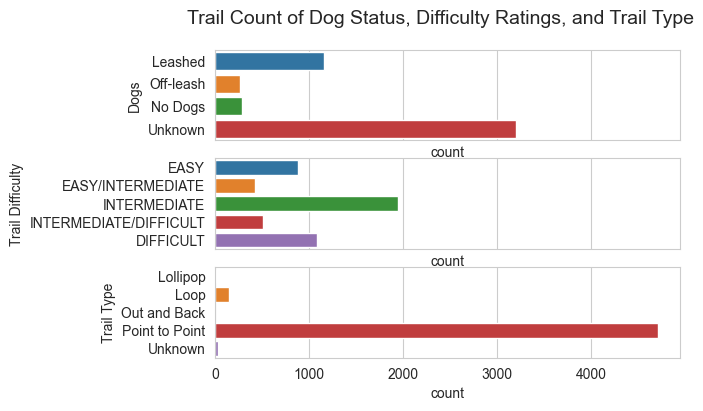

In [8]:
# Plot count data of Dogs and Trail Difficulty on Bar Graphs

plt.rcParams["figure.figsize"] = [6, 4]
sns.set_style("whitegrid")
fig, axs = plt.subplots(nrows=3,sharex=True)
sns.countplot(y=df['Dogs'],order=['Leashed', 'Off-leash', 'No Dogs', 'Unknown'],ax=axs[0])
sns.countplot(y=df['Trail Difficulty'],
               order=['EASY', 'EASY/INTERMEDIATE', 'INTERMEDIATE',
                      'INTERMEDIATE/DIFFICULT', 'DIFFICULT'],ax=axs[1])
sns.countplot(y=df['Trail Type'],order=['Lollipop', 'Loop', 'Out and Back',
                      'Point to Point', 'Unknown'], ax=axs[2])
fig.suptitle('Trail Count of Dog Status, Difficulty Ratings, and Trail Type', fontsize=14)


plt.show()

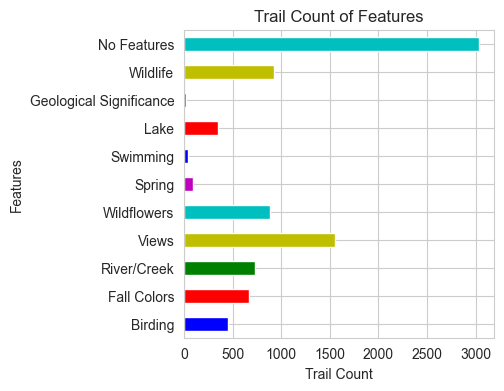

In [7]:
features = df[['Birding', 'Fall Colors', 'River/Creek', 'Views', 'Wildflowers',
               'Spring', 'Swimming', 'Lake', 'Geological Significance', 'Wildlife',
               'No Features']].apply(pd.value_counts)

# Plot count data of Features on Bar Graphs
plt.rcParams["figure.figsize"] = [4, 4]
fig , ax = plt.subplots()
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm']), None, len(df)))
ax = features.loc[True].plot.barh(color=my_colors)
plt.xlabel('Trail Count')
plt.ylabel('Features')
plt.title('Trail Count of Features')
plt.show()

It appears that most trails to not have much information regarding dog status or feature information. Most trails seem to be of intermediate difficulty, followed by difficult, then easy. Views, Wildlife, and wildflowers are the top 3 mentions in the trails that do have features. The majority of trails are also point to point with a few loop based trails. For those trails where dog status information is available, leashed dogs are the most frequent requirement.

The distibution of the numerical variables will be explored next. Again, looking for shape, skewness, outliers and patterns that might help us understand ratings.

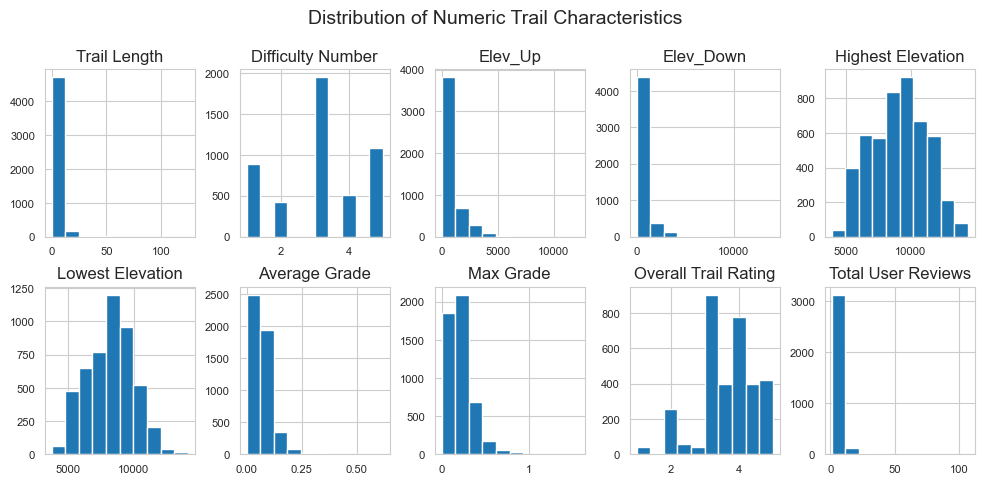

In [8]:
# Plot count data of numeric columns on Histograms
plt.rcParams["figure.figsize"] = [12, 5]
axes = df.select_dtypes(include=['float64']).hist(ylabelsize=8,xlabelsize=8,grid=True,layout=(2,5))
plt.suptitle("Distribution of Numeric Trail Characteristics",y=1.0,fontsize=14);

Now that we can see the distributons, we notice that most trails are very short, there are a couple of very long trailsthat might skew the ratings. The highest and lower elevations of the trails seem roughly normally distributed and look like a good sampling of the elevations one might experience in Colorado.

As noted earlier, the Overal Trail ratings are definately skewews towards the 3 to 4 scale and the number of total reviews is very biased to only a few rewiews per trail with an outlier (not able to see in histrogram) at about 107 reviews. Maybe this is a very popular trail that is easily accessible.

Most trails have a small grade which is likely to influence difficulty and might also have an influence in rating.

Many trails also have sa small elevation gain (Elev_Up) and loss (Elev_Down) and are probably correlated with trail length and difficulty as well.

Exploring the relationship between variables is of interest as well and the next visual will give us some sense of that for the numerical based variables.

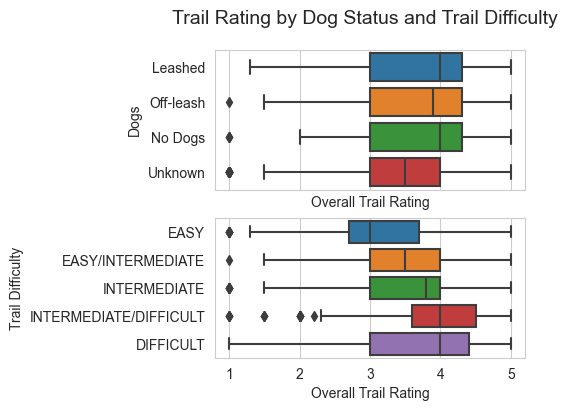

In [9]:
# Plot Box Plot for Trail Rating vs. Trail Difficulty and Dog Status
plt.rcParams["figure.figsize"] = [4, 4]
sns.set_style("whitegrid")
fig, axs = plt.subplots(nrows=2,sharex=True)
g = sns.boxplot(data=df, x='Overall Trail Rating', y='Trail Difficulty',order=['EASY', 'EASY/INTERMEDIATE', 'INTERMEDIATE',
                      'INTERMEDIATE/DIFFICULT', 'DIFFICULT'], ax=axs[1])
g1 = sns.boxplot(data=df, x='Overall Trail Rating', y='Dogs', order=['Leashed', 'Off-leash', 'No Dogs', 'Unknown'],ax=axs[0])
#g.tick_params(axis='x', rotation=90)
#g1.tick_params(axis='x', rotation=90)
fig.suptitle('Trail Rating by Dog Status and Trail Difficulty', y=0.98,fontsize=14)
plt.show()

A quick look a Dog Status and Trail Difficulty relative to Overall Rating in a box plot type graph does not reveal obvious relationships, but there does seem to be an slight skew of more difficulty trails being rated higher.

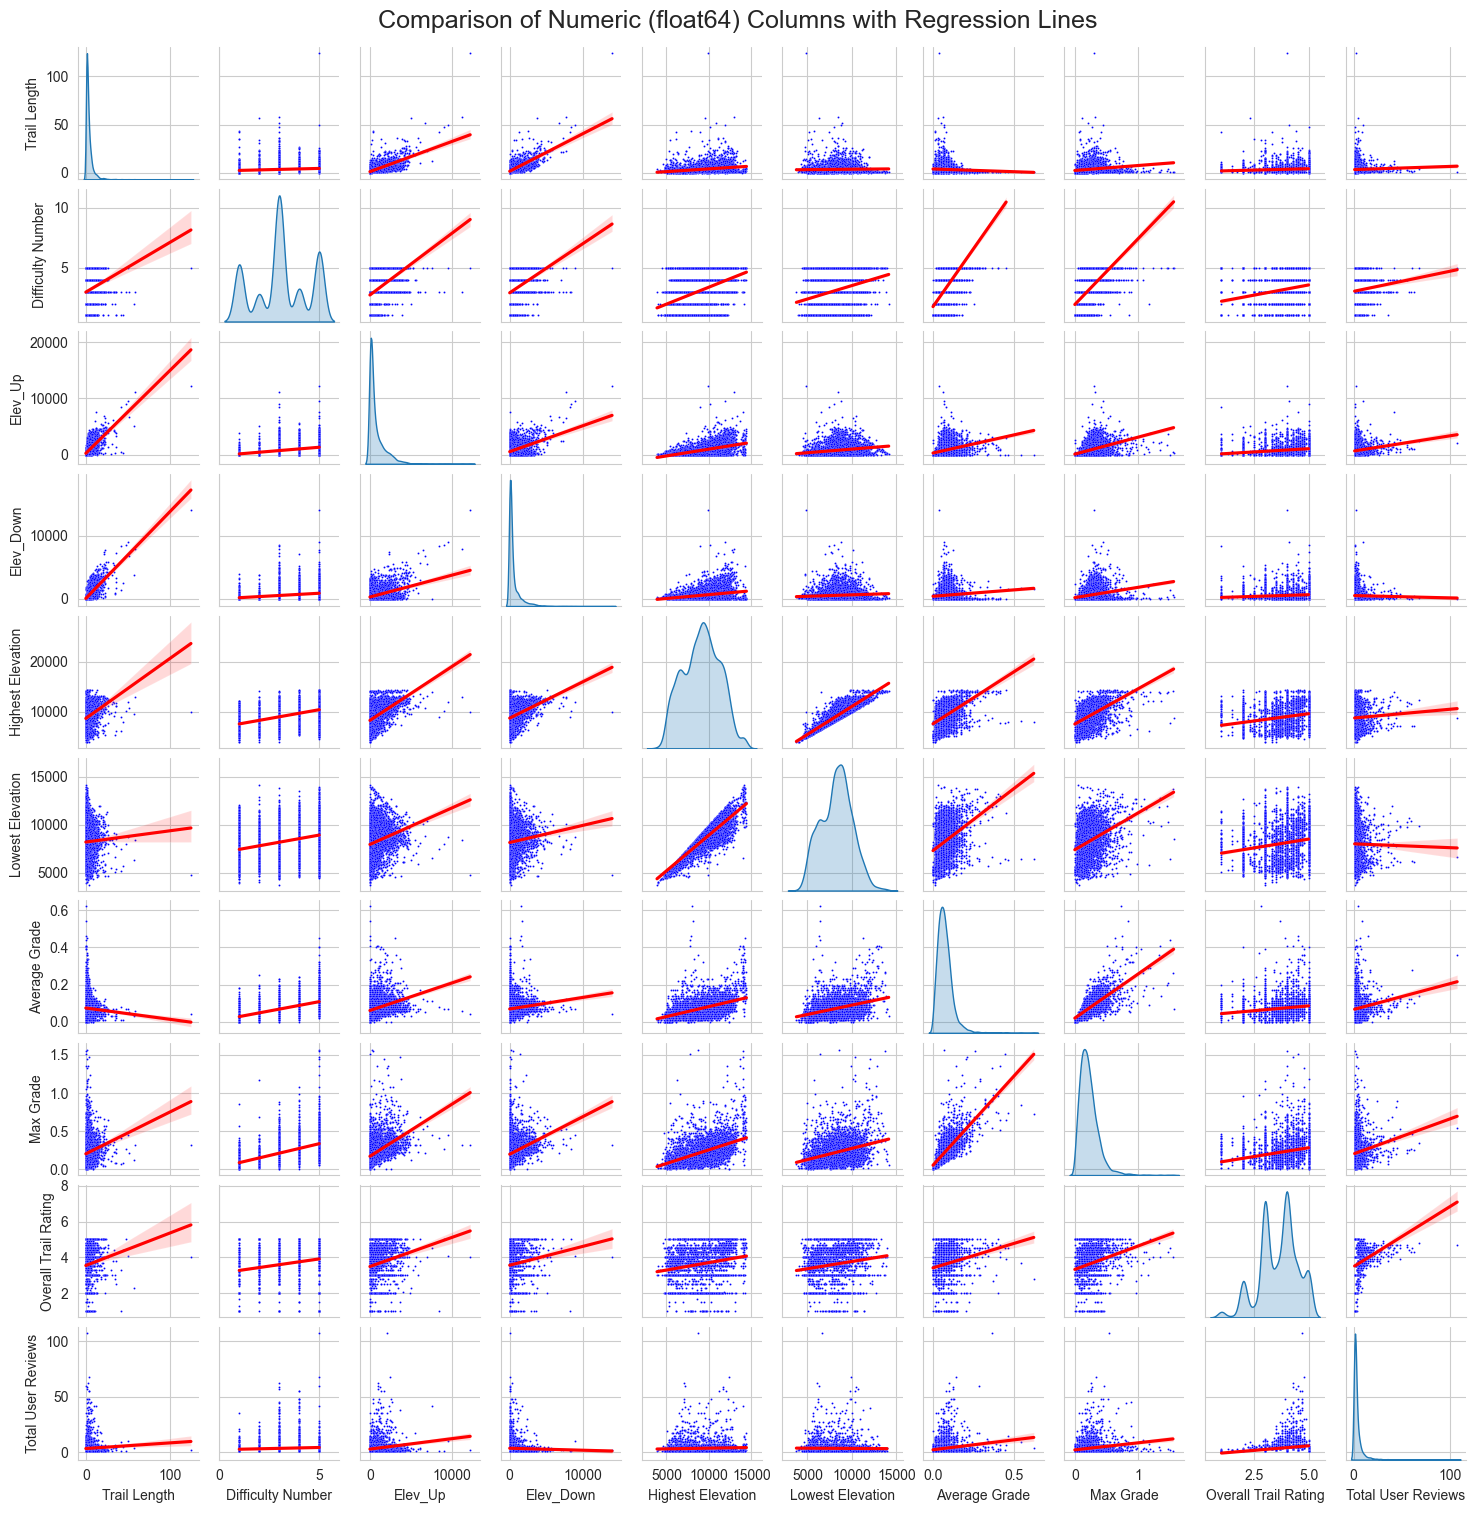

In [10]:
# Make a paired plot of float64/numeric columns to explore relationships and include histograms
sns.set_style("whitegrid")
g = sns.pairplot(df.select_dtypes(include=['float64']),diag_kind="kde",
                 plot_kws={'s':2,'color':'blue'},height = 1.5);
g.map_offdiag(sns.regplot,line_kws={'color':'red'},scatter= False)
g.fig.suptitle('Comparison of Numeric (float64) Columns with Regression Lines',y=1.01,fontsize=18)
plt.show()

Making a scatter plot with regression lines for all pairwise combinations of float based variables reveals some obvious relationships between elevation based variables as well as grade based variables.

The bias between total user reviews and overal trail rating becomes more clear in this view. It appears ther is a non-linear relationship as well as the number of higher review ratings having fewer number of reviews.

There appears to be a slight relationship between overall rating and grade as well as elevation gain/loss. While trail length does not appear to have an obious relationship with overal rating.

A multivariate modeling approach maybe more appropriate at this point and the next sections will explore those relationship.

## Analysis in R

In [1]:
%load_ext rpy2.ipython 
# Required to run R in the notebook

Load required libraries.

In [2]:
%%R 
library(dplyr)
library(tidyr)
library(stringr)
library(leaps)
library(tidyverse)
library(reticulate)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [3]:
%%R
pd <-import("pandas")
pickle_data <- pd$read_pickle("2. Clean python code/hike_project_cleaned.pkl")

Some required cleaning for the data to be efficiently analyzed in R. Simplifies names and sets the NaN values to zero.

In [4]:
%%R

pickle.minus <- select(pickle_data, -c("Area", 'City', 'State', 'Site'))
pickle.minus['Total User Reviews'][is.na(pickle.minus['Total User Reviews'])] <- 0
pickle.minus$UserReview <- as.numeric(pickle.minus$'Total User Reviews')
pickle.minus['Overall Trail Rating'][is.na(pickle.minus['Overall Trail Rating'])] <- 0
pickle.minus$TrailRating <- as.numeric(pickle.minus$'Overall Trail Rating')
pickle.minus$Elev_High <- pickle.minus$'Highest Elevation'
pickle.minus$Low_High <- pickle.minus$'Lowest Elevation'
pickle.minus$GradeAvg <- pickle.minus$'Average Grade'
pickle.minus$GradeMax <- pickle.minus$'Max Grade'
pickle.minus$TrailLength <- pickle.minus$'Trail Length'

Turns categorical variables into factors.

In [5]:
%%R

pickle.minus['Dogs'][is.na(pickle.minus['Dogs'])] <- 'Unknown'
pickle.minus$Dogs <- str_split_fixed(pickle.minus$Dogs, ' ', 2)
pickle.minus$Dogs_Factor <- as.factor(pickle.minus$Dogs[,1])

In [9]:
%%R

pickle.minus$Difficulty_Factor <- as.factor(pickle.minus$'Trail Difficulty')
pickle.minus$TrailType_Factor <- as.factor(pickle.minus$'Trail Type')
pickle.minus$FallColor_Factor <- as.factor(pickle.minus$'Fall Color')
pickle.minus$River_Factor <- as.factor(pickle.minus$River)
pickle.minus$Views_Factor <- as.factor(pickle.minus$Views)
pickle.minus$Wildlife_Factor <- as.factor(pickle.minus$Wildlife)
pickle.minus$Wildflowers_Factor <- as.factor(pickle.minus$Wildflower)
pickle.minus$Birding_Factor <- as.factor(pickle.minus$Birding)
pickle.minus$Lake_Factor <- as.factor(pickle.minus$Lake)
pickle.minus$GeoSig_Factor <- as.factor(pickle.minus$'Geological Significance')

In [10]:
%%R

summary(pickle.minus)

  Trail Name         Trail Length     Trail Difficulty   Difficulty Number
 Length:4903        Min.   :  0.000   Length:4903        Min.   :1.000    
 Class :character   1st Qu.:  1.000   Class :character   1st Qu.:2.000    
 Mode  :character   Median :  2.100   Mode  :character   Median :3.000    
                    Mean   :  3.505                      Mean   :3.099    
                    3rd Qu.:  4.300                      3rd Qu.:4.000    
                    Max.   :124.500                      Max.   :5.000    
                                                         NA's   :59       
  Trail Type           Elev_Up          Elev_Down     Highest Elevation
 Length:4903        Min.   :    0.0   Min.   :    0   Min.   : 3886    
 Class :character   1st Qu.:   85.0   1st Qu.:   22   1st Qu.: 7436    
 Mode  :character   Median :  329.0   Median :  150   Median : 9166    
                    Mean   :  758.1   Mean   :  503   Mean   : 9088    
                    3rd Qu.: 1062.0   3r

Creates a new dataframe with only the columns that will be analyzed. Removes trails without a user rating.

In [11]:
%%R

trail <- select(pickle.minus, -c('Fall Colors', 'River/Creek', 'Views', 'Wildlife', 'Wildflowers', 'Birding', 'Lake', 'Geological Significance', 'Highest Elevation', 'Lowest Elevation', 'Average Grade', 'Max Grade', 'Trail Length'))
trail.no.user <- trail[trail$UserReview=="0",]
trail.minus <- trail[!trail$UserReview=="0",]
nrow(trail.no.user)

[1] 1596


We determine if any factors contribute to the rating in a statistically significant way, p < .05.  

In [ ]:
%%R

model.one <- lm(TrailRating ~ TrailType_Factor + Difficulty_Factor + Elev_Up + Elev_Down + GradeAvg + GradeMax + TrailLength + UserReview + Dogs_Factor + FallColor_Factor + River_Factor + Views_Factor + Wildlife_Factor + Wildflowers_Factor + Birding_Factor + Lake_Factor + GeoSig_Factor, data=trail.minus)
summary(model.one)

Using best subset regression with all the factors.

In [ ]:
%%R
fmla <-as.formula("TrailRating ~ TrailType_Factor + Difficulty_Factor + Elev_Up + Elev_Down + GradeAvg + GradeMax + TrailLength + UserReview + Dogs_Factor + FallColor_Factor + River_Factor + Views_Factor + Wildlife_Factor + Wildflowers_Factor + Birding_Factor + Lake_Factor + GeoSig_Factor + UserReview")
x<-model.matrix(fmla, data=trail.minus)
y<-trail.minus$TrailRating
best<-regsubsets(x=x[,2:ncol(x)], y=y, method="exhaustive", nvmax=50, nbest=1)
summary(best)


Determine which coefficents belong to the model with the lowest BIC.

In [ ]:
%%R
best.subset.bic<-which(summary(best)$bic==min(summary(best)$bic))[1]
best.subset.bic
coef(best, best.subset.bic)

Not all the trails have features. Removing the features from the model formula.

In [ ]:
%%R
fmla.nf <-as.formula("TrailRating ~ TrailType_Factor + Difficulty_Factor + Elev_Up + Elev_Down + GradeAvg + GradeMax + TrailLength")
x<-model.matrix(fmla.nf, data=trail.minus)
y<-trail.minus$TrailRating
best.nf <-regsubsets(x=x[,2:ncol(x)], y=y, method="exhaustive", nvmax=30, nbest=1)
summary(best.nf)

Determine which coefficients belong to the model with the lowest BIC.

In [ ]:
%%R

best.nf.subset.bic<-which(summary(best.nf)$bic==min(summary(best.nf)$bic))[1]
best.coef <- coef(best.nf, best.nf.subset.bic)
best.coef